In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_excel("sales_cleaned.xlsx")
df

,S.no,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,11238,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11227,11239,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11228,11240,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11229,11241,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [3]:
df.drop(columns=["S.no"],inplace=True)


In [4]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11227,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11228,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11229,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11231 non-null  int64 
 1   Cust_name         11231 non-null  object
 2   Product_ID        11231 non-null  object
 3   Gender            11231 non-null  object
 4   Age Group         11231 non-null  object
 5   Age               11231 non-null  int64 
 6   Marital_Status    11231 non-null  int64 
 7   State             11231 non-null  object
 8   Zone              11231 non-null  object
 9   Occupation        11231 non-null  object
 10  Product_Category  11231 non-null  object
 11  Orders            11231 non-null  int64 
 12  Amount            11231 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Step-4:Data Analysis

**1.Count of males and females**

In [7]:
df["Gender"].value_counts()

Gender
F    7828
M    3403
Name: count, dtype: int64

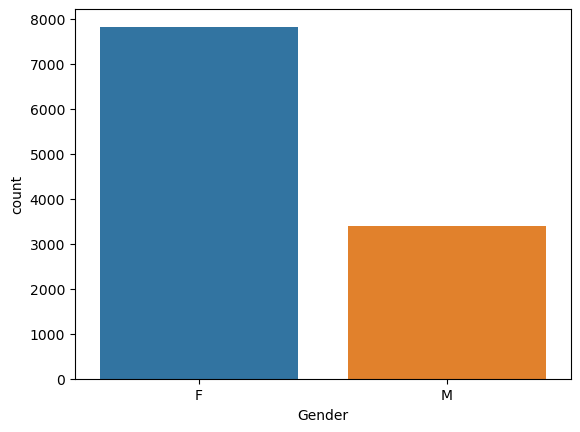

In [8]:
sns.countplot(x=df["Gender"])
plt.show()

In [9]:
df.groupby("Gender")["Amount"].count()

Gender
F    7828
M    3403
Name: Amount, dtype: int64

In [10]:
df.groupby("Gender")["Amount"].sum()

Gender
F    74307679
M    31871146
Name: Amount, dtype: int64

- **From the above graph,we can see that most of the buyers are females and even the purchasing power of females are greater than men**

**2.Distribution of data by age group**

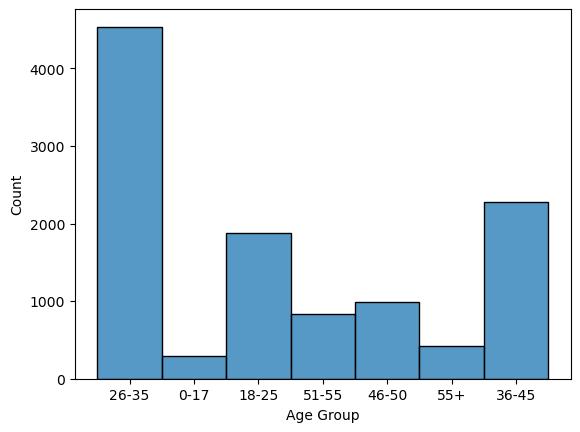

In [11]:
sns.histplot(x=df["Age Group"])
plt.show()

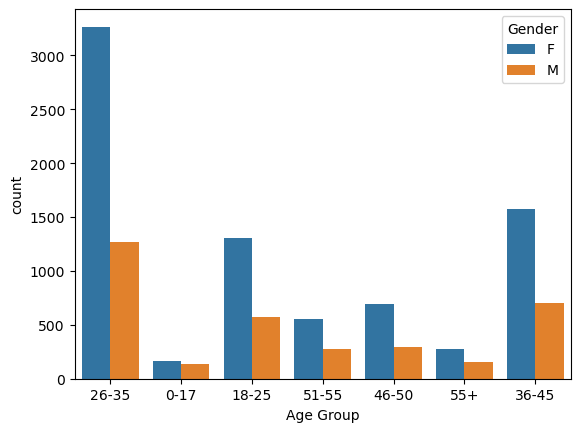

In [12]:
sns.countplot(x=df["Age Group"],hue=df["Gender"])
plt.show()

- **From the above graphs,we can see that most of the buyers are from 26-35 years females**

**3.Total number of orders from each state**

In [13]:
df.groupby("State")["Orders"].count()

State
Andhra Pradesh       811
Bihar                433
Delhi               1104
Gujarat              426
Haryana              451
Himachal Pradesh     608
Jharkhand            380
Karnataka           1304
Kerala               453
Madhya Pradesh       921
Maharashtra         1522
Punjab               200
Rajasthan            231
Telangana            125
Uttar Pradesh       1942
Uttarakhand          320
Name: Orders, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Maharashtra'),
  Text(1, 0, 'Andhra\xa0Pradesh'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Karnataka'),
  Text(4, 0, 'Gujarat'),
  Text(5, 0, 'Himachal Pradesh'),
  Text(6, 0, 'Delhi'),
  Text(7, 0, 'Jharkhand'),
  Text(8, 0, 'Kerala'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Madhya Pradesh'),
  Text(11, 0, 'Bihar'),
  Text(12, 0, 'Rajasthan'),
  Text(13, 0, 'Uttarakhand'),
  Text(14, 0, 'Telangana'),
  Text(15, 0, 'Punjab')])

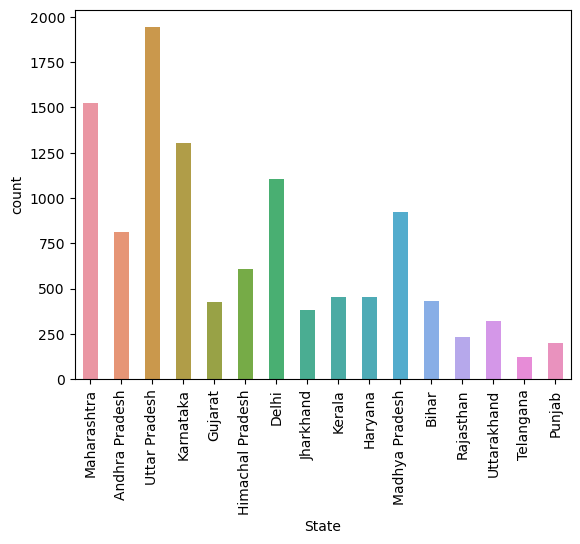

In [14]:
sns.countplot(x=df["State"],width=0.5)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Maharashtra'),
  Text(1, 0, 'Andhra\xa0Pradesh'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Karnataka'),
  Text(4, 0, 'Gujarat'),
  Text(5, 0, 'Himachal Pradesh'),
  Text(6, 0, 'Delhi'),
  Text(7, 0, 'Jharkhand'),
  Text(8, 0, 'Kerala'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Madhya Pradesh'),
  Text(11, 0, 'Bihar'),
  Text(12, 0, 'Rajasthan'),
  Text(13, 0, 'Uttarakhand'),
  Text(14, 0, 'Telangana'),
  Text(15, 0, 'Punjab')])

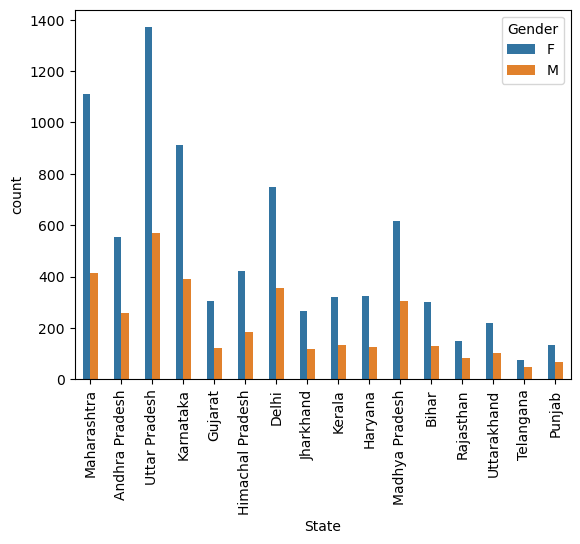

In [15]:
sns.countplot(x=df["State"],width=0.5,hue=df["Gender"])
plt.xticks(rotation=90)

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

- **From the above graph,we can see that most of the orders are from Uttar Pradesh,Maharashtra,Karnataka and Delhi**

**4.Total number of amount/sales from each state**

In [17]:
df.groupby("State")["Amount"].sum()

State
Andhra Pradesh       8037146
Bihar                4014669
Delhi               11603818
Gujarat              3938159
Haryana              4217871
Himachal Pradesh     4963368
Jharkhand            3026456
Karnataka           13523540
Kerala               3894491
Madhya Pradesh       8101142
Maharashtra         14404467
Punjab               1525800
Rajasthan            1909409
Telangana            1151490
Uttar Pradesh       19346055
Uttarakhand          2520944
Name: Amount, dtype: int64

In [18]:
df.groupby("State")["Amount"].mean()

State
Andhra Pradesh       9910.167694
Bihar                9271.752887
Delhi               10510.704710
Gujarat              9244.504695
Haryana              9352.263858
Himachal Pradesh     8163.434211
Jharkhand            7964.357895
Karnataka           10370.812883
Kerala               8597.110375
Madhya Pradesh       8796.028230
Maharashtra          9464.170171
Punjab               7629.000000
Rajasthan            8265.839827
Telangana            9211.920000
Uttar Pradesh        9961.923275
Uttarakhand          7877.950000
Name: Amount, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Maharashtra'),
  Text(1, 0, 'Andhra\xa0Pradesh'),
  Text(2, 0, 'Uttar Pradesh'),
  Text(3, 0, 'Karnataka'),
  Text(4, 0, 'Gujarat'),
  Text(5, 0, 'Himachal Pradesh'),
  Text(6, 0, 'Delhi'),
  Text(7, 0, 'Jharkhand'),
  Text(8, 0, 'Kerala'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Madhya Pradesh'),
  Text(11, 0, 'Bihar'),
  Text(12, 0, 'Rajasthan'),
  Text(13, 0, 'Uttarakhand'),
  Text(14, 0, 'Telangana'),
  Text(15, 0, 'Punjab')])

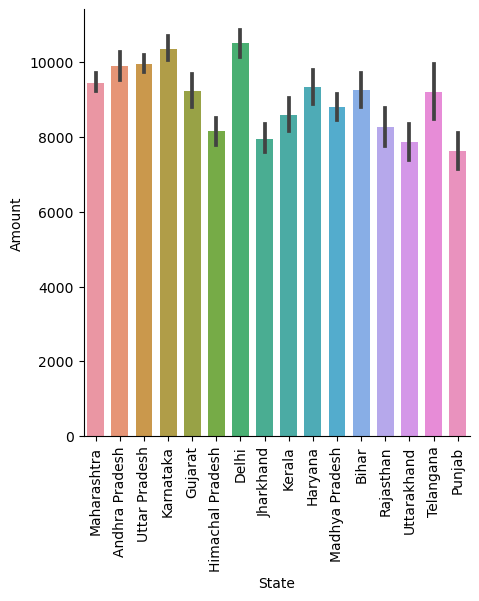

In [19]:
sns.catplot(x="State",y="Amount",data=df,kind="bar",width=0.7)
plt.xticks(rotation=90)

- **From the above graph we can see that most of the sales are also from Uttar Pradesh,Maharashtra,Karnataka and Delhi**

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**5.Count of married and unmarried people**

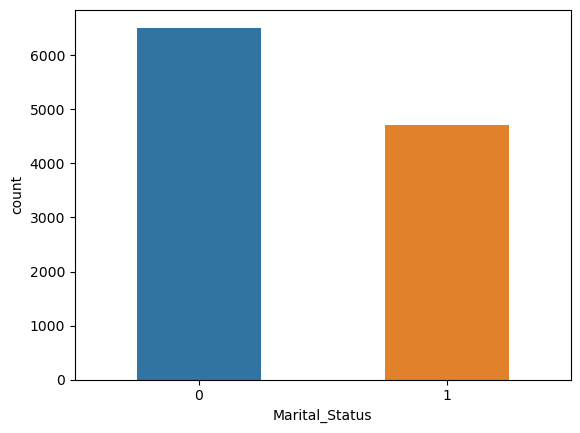

In [42]:
sns.countplot(x=df["Marital_Status"],width=0.5)
plt.show()

- 0-->Married
- 1-->Not married

In [39]:
df["Marital_Status"].value_counts()

Marital_Status
0    6514
1    4717
Name: count, dtype: int64

In [29]:
df.shape

(11231, 13)

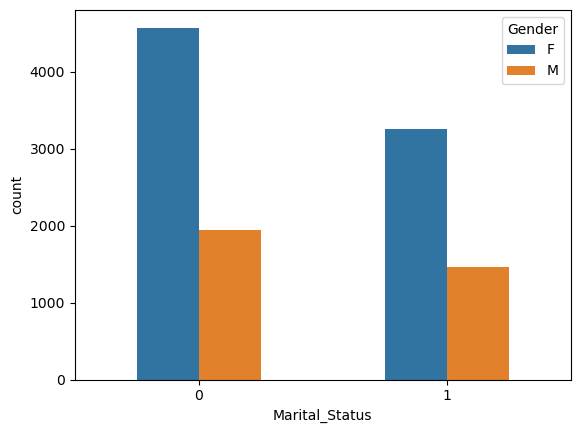

In [43]:
sns.countplot(x=df["Marital_Status"],width=0.5,hue=df["Gender"])
plt.show()

- **From the above graph,we can see that most of the buyers are Married Womens**

**6.Which occupation does most of the buyers are doing?**

In [46]:
df["Occupation"].value_counts()

Occupation
IT Sector          1581
Healthcare         1408
Aviation           1309
Banking            1137
Govt                854
Hospitality         700
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        413
Textile             349
Agriculture         282
Name: count, dtype: int64

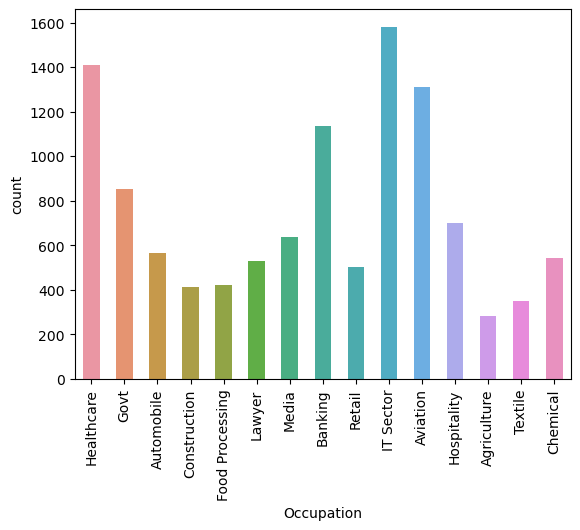

In [45]:
sns.countplot(x=df["Occupation"],width=0.5)
plt.xticks(rotation=90)
plt.show()


In [53]:
df.groupby("Occupation")["Amount"].sum()


Occupation
Agriculture         2584999
Automobile          5368596
Aviation           12599994
Banking            10770610
Chemical            5297436
Construction        3589588
Food Processing     4070670
Govt                8517212
Healthcare         13034586
Hospitality         6337633
IT Sector          14741862
Lawyer              4981665
Media               6295832
Retail              4783170
Textile             3204972
Name: Amount, dtype: int64

- **From the above graph,we can say most of the buyers are working in IT Sector,Healthcare and Aviation**

**7.Which Products are buying more?**

In [54]:
df["Product_Category"].value_counts()

Product_Category
Clothing & Apparel       2653
Food                     2490
Electronics & Gadgets    2082
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Decor                      96
Auto                       96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

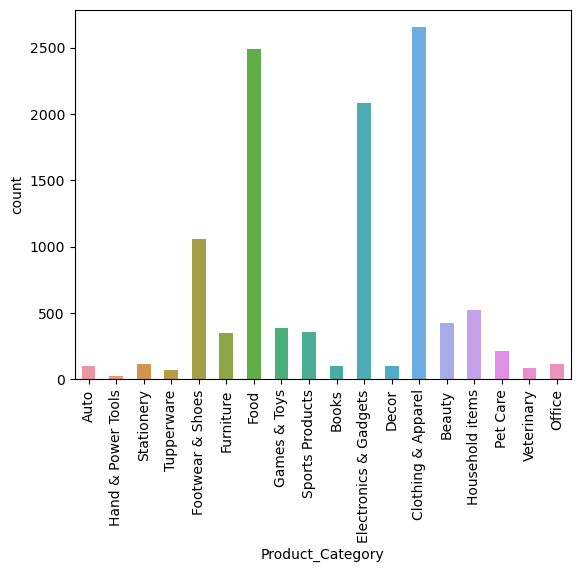

In [56]:
sns.countplot(x=df["Product_Category"],width=0.5)
plt.xticks(rotation=90)
plt.show()

In [62]:
df.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)


Product_Category
Food                     33933883
Clothing & Apparel       16484472
Electronics & Gadgets    15607657
Footwear & Shoes         15575209
Furniture                 5440051
Games & Toys              4331694
Sports Products           3635933
Beauty                    1959484
Auto                      1935041
Stationery                1676051
Household items           1569337
Tupperware                1155642
Books                     1061478
Decor                      730360
Pet Care                   482277
Hand & Power Tools         405618
Veterinary                 112702
Office                      81936
Name: Amount, dtype: int64

- **From the above graph,we can see that most of the sold products are from Food,Clothing & Apparel and Electronics & Gadgets**

**8.Which Product_ID has most orders?**

In [63]:
df["Product_ID"].nunique()

2350

In [69]:
df.groupby("Product_ID")["Orders"].sum().sort_values(ascending=False)

Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00025442     79
            ... 
P00067442      1
P00066142      1
P00213442      1
P00064342      1
P00354242      1
Name: Orders, Length: 2350, dtype: int64

# Conclusion


**From this analysis,we conclude that Married Women age group 26-35 years from Uttar Pradesh,Maharashtra and Karnataka working in IT Sector,Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics category**